# Question 1: SVM (Ex 5.5 Mohri)

### Please use the associated Satimage training and testing datasets for this problem

### (a) Normalize the data. Please note we have already split the data into training and testing vectors for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
from sklearn import metrics
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [2]:
def readData(name):
    f = open(name, "r")
    str = f.read()
    rows = str.split("\n")
    del rows[-1]
    return rows

In [3]:
def dataToList(rows):
    ret = []
    for row in rows:
        arr = np.empty(37)
        arr.fill(np.nan)
        tmp = row.split(" ")
        arr[0] = tmp[0]
        del tmp[0]
        del tmp[-1]
        for r in tmp:
            k = r.split(":")
            arr[int(k[0])] = k[1]
        ret.append(arr)
    return ret

In [4]:
def dataNormalize(X):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    return imp_mean.fit_transform(X)

In [5]:
rows = readData("./dataset/satimage.scale.training")
data = dataToList(rows)
Train = pd.DataFrame(dataNormalize(dataNormalize(data)))
rows = readData("./dataset/satimage.scale.t")
data = dataToList(rows)
Test = pd.DataFrame(dataNormalize(dataNormalize(data)))

### (b) (Hyperparameter Tuning) Consider the binary classification that consists of distinguishing class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to solve this classification problem. For each value of the polynomial degree, d = 1, 2, 3, 4, plot the average 10-fold cross-validation error plus or minus one standard deviation as a function of C (let the other parameters of the polynomial kernels be equal to their default values) ON THE TRAINING DATA. Report the best value of the trade-off constant C measured on the training internal cross-validation.

The training best value of the trade-off constant C measured on the training internal cross-validation for Degree=1 is 400, Degree=2 is 400, Degree3 is 800, Degree4 is 800.

In [6]:
X_train = Train.iloc[:, 1:]

In [7]:
tmp = []
for e in Train.iloc[:, 0].values:
    if(e == 6.0):
        tmp.append(2)
    else:
        tmp.append(1)
y_train = pd.DataFrame(tmp)

In [8]:
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.svm import SVC
class PolynomialSVC:
    def __init__(self, numFolds, d, C):
        self.numFolds = numFolds
        self.svc = SVC(kernel='poly', degree = d, gamma = 'auto', C = C)
        
    def cross_validation(self, X, y):
        kf = KFold(n_splits= self.numFolds,shuffle=True)
        fold = 0
        ret = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.train( X_train, y_train)
            tmp = self.predict(X_test)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, self.predict(X_test), pos_label=2)
            score = metrics.auc(fpr, tpr)
            #print("Fold", fold,":\tAccuracy: ", score)
            ret.append(score)
            fold += 1
        #print("Average Auc Score:", mean(ret))
        return ret
    def train(self, X, y):
        self.svc.fit(X, y)
    def predict(self, X):
        return self.svc.predict(X)
    def score(self, X, y):
        return self.svc.score(X, y)

In [9]:
def cal_avg_std( dd):
    arr = []
    std = []
    avg = []
    
    clf = PolynomialSVC( numFolds = 10, d = dd, C = 10.0)
    arr.append(clf.cross_validation( X_train.values, y_train.values.ravel()))
    clf = PolynomialSVC( numFolds = 10, d = dd, C = 50.0)
    arr.append(clf.cross_validation( X_train.values, y_train.values.ravel()))
    clf = PolynomialSVC( numFolds = 10, d = dd, C = 100.0)
    arr.append(clf.cross_validation( X_train.values, y_train.values.ravel()))
    clf = PolynomialSVC( numFolds = 10, d = dd, C = 200.0)
    arr.append(clf.cross_validation( X_train.values, y_train.values.ravel()))
    clf = PolynomialSVC( numFolds = 10, d = dd, C = 400.0)
    arr.append(clf.cross_validation( X_train.values, y_train.values.ravel()))
    clf = PolynomialSVC( numFolds = 10, d = dd, C = 800.0)
    arr.append(clf.cross_validation( X_train.values, y_train.values.ravel()))
    for i in range(len(arr)):
        std.append(stdev(arr[i]))
        avg.append(mean(arr[i]))
    return [avg, std]

In [10]:
D = []
D.append(cal_avg_std(1))
D.append(cal_avg_std(2))
D.append(cal_avg_std(3))
D.append(cal_avg_std(4))

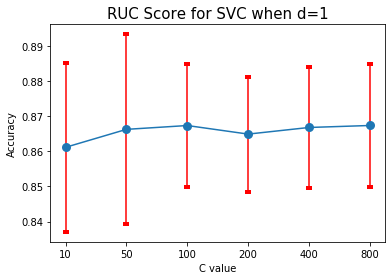

In [11]:
import matplotlib.pyplot as plt
plt.errorbar(['10', '50', '100', '200', '400', '800'], D[0][0], D[0][1], marker='o', mew=4 , ms=5, capsize = 3, ecolor = 'r')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('RUC Score for SVC when d=1', fontsize=15)
plt.show()

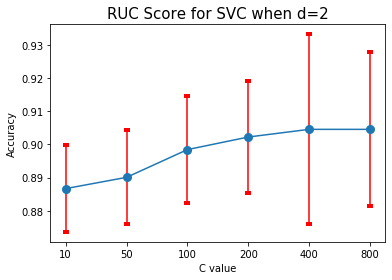

In [12]:
import matplotlib.pyplot as plt
plt.errorbar(['10', '50', '100', '200', '400', '800'], D[1][0], D[1][1], marker='o', mew=4 , ms=5, capsize = 3, ecolor = 'r')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('RUC Score for SVC when d=2', fontsize=15)
plt.show()

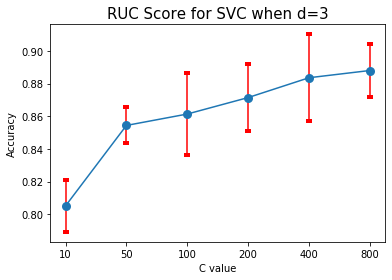

In [13]:
import matplotlib.pyplot as plt
plt.errorbar(['10', '50', '100', '200', '400', '800'], D[2][0], D[2][1], marker='o', mew=4 , ms=5, capsize = 3, ecolor = 'r')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('RUC Score for SVC when d=3', fontsize=15)
plt.show()

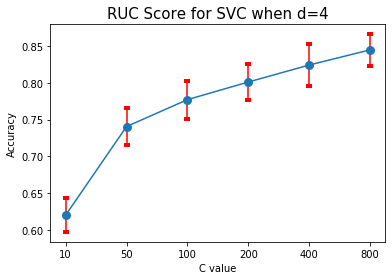

In [14]:
import matplotlib.pyplot as plt
plt.errorbar(['10', '50', '100', '200', '400', '800'], D[3][0], D[3][1], marker='o', mew=4 , ms=5, capsize = 3, ecolor = 'r')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('RUC Score for SVC when d=4', fontsize=15)
plt.show()

### (c) (Model Training and Testing) Let (C∗, d∗) be the best pair found previously in the 10-fold internal cross validation. Build a model for each pair on the full training data. Then plot the test errors for each model, as a function of d.

In [15]:
X_test = Test.iloc[:, 1:]
tmp = []
for e in Test.iloc[:, 0].values:
    if(e == 6.0):
        tmp.append(2)
    else:
        tmp.append(1)
y_test = pd.DataFrame(tmp)

In [16]:
arr = []
clf1 = PolynomialSVC( numFolds = 10, d = 1, C = 200.0)
clf1.train(X_train.values, y_train.values.ravel())
fpr, tpr, thresholds = metrics.roc_curve(y_test.values.ravel(), clf1.predict(X_test.values), pos_label=2)
score = metrics.auc(fpr, tpr)
arr.append(score)

In [17]:
clf2 = PolynomialSVC( numFolds = 10, d = 2, C = 400.0)
clf2.train(X_train.values, y_train.values.ravel())
fpr, tpr, thresholds = metrics.roc_curve(y_test.values.ravel(), clf2.predict(X_test.values), pos_label=2)
score = metrics.auc(fpr, tpr)
arr.append(score)

In [18]:
clf3 = PolynomialSVC( numFolds = 10, d = 3, C = 800.0)
clf3.train(X_train.values, y_train.values.ravel())
fpr, tpr, thresholds = metrics.roc_curve(y_test.values.ravel(), clf2.predict(X_test.values), pos_label=2)
score = metrics.auc(fpr, tpr)
arr.append(score)

In [19]:
clf4 = PolynomialSVC( numFolds = 10, d = 4, C = 800.0)
clf4.train(X_train.values, y_train.values.ravel())
fpr, tpr, thresholds = metrics.roc_curve(y_test.values.ravel(), clf4.predict(X_test.values), pos_label=2)
score = metrics.auc(fpr, tpr)
arr.append(score)

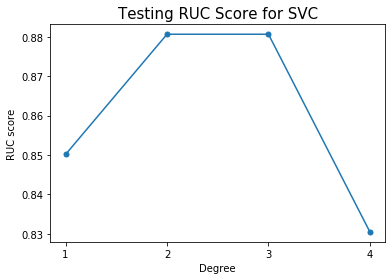

In [20]:
plt.plot(['1', '2', '3', '4'], arr, marker='o', ms=5)
plt.xlabel('Degree')
plt.ylabel('RUC score')
plt.title('Testing RUC Score for SVC', fontsize=15)
plt.show()

### (d) (Results Evaluation) Plot the average number of support vectors obtained as a function of d.

In [21]:
print("support vectors of degree 1:", len(clf1.svc.support_))
print("support vectors of degree 2:", len(clf2.svc.support_))
print("support vectors of degree 3:", len(clf3.svc.support_))
print("support vectors of degree 4:", len(clf4.svc.support_))

support vectors of degree 1: 947
support vectors of degree 2: 780
support vectors of degree 3: 842
support vectors of degree 4: 1048


### (e) (Results Evaluation) How many of the support vectors lie on the margin hyperplanes?

I am not sure what this question means. I think it means that how many of the support vectors are "exactly" on the margin hyperplanes (Not the points in the marginal zone). We can see from the results showed belowed, there's no point on the hyperplane. However, we can see from the histograms, there are a lot of points very close to the hyperplanes.

In [30]:
a1 = clf1.svc.decision_function(X_train.values)
print(np.sum(a1==0))
a2 = clf2.svc.decision_function(X_train.values)
print(np.sum(a2==0))
a3 = clf3.svc.decision_function(X_train.values)
print(np.sum(a3==0))
a4 = clf4.svc.decision_function(X_train.values)
print(np.sum(a4==0))

0
0
0
0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f311be0>]],
      dtype=object)

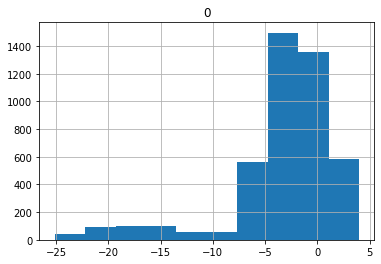

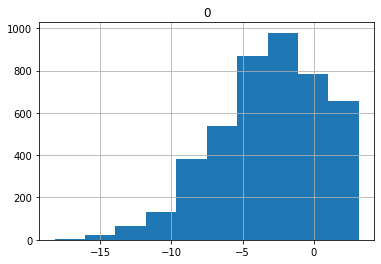

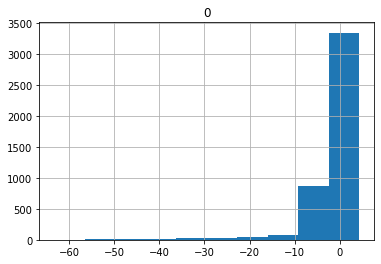

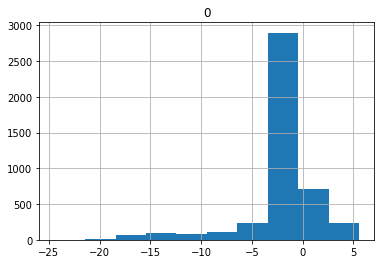

In [31]:
pd.DataFrame(a1).hist()
pd.DataFrame(a2).hist()
pd.DataFrame(a3).hist()
pd.DataFrame(a4).hist()

In [22]:
hyperplane = clf1.svc.decision_function(X_test.values)
len(clf1.svc.support_vectors_)

947

In [23]:
len(clf1.svc.dual_coef_[0])

947

### (f) (Conceptual) Explain how the parameter d influences the model fit (margin size and #number of support vectors).

The Degree d=1 and Degree d=4 seems to have more support vectors than Degree d=1 and d=2. I could be that when Degree d=1 and 2, the marginal hyperplane fits the data more.

### (g) (Conceptual) Assume you were using an RBF kernel instead of polynomial kernel, what would the parameter γ influence in terms of the model fit (margin size and # number of support vectors).

Radial Based Function(RBF) Kernel is used to classify non-linear seperable data.
As we can see from the RBF equation, the parameter γ is a constant value. The γ parameter defines how far the influence of a single training example reaches, with low values meaning "far" and high values meaning "close".
When gamma is very small, the model is constrained and cannot capture the complexity of the data. When gamma is very Big, the radius of the area of influence of the support vectors only includes the support vector itself, which can easily go overfitting.